In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_data(output_wave_list, output_flux_list, wave_interpol, photometry):
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.figure()
    plt.plot(output_wave_list, output_flux_list, zorder=1)
    
    plt.scatter(wave_interpol, photometry,c='red',zorder=2)
    plt.legend(['Simulated Spectra','Photometry'])
    plt.xlabel('Wavelength (µm)')
    plt.ylabel('Flux')
    plt.title('Generated Spectra with Photometry Points')
    # plt.legend()
    plt.grid(True)
    
    
    plt.savefig('synth.png', dpi=300, bbox_inches='tight')
    plt.show()

(17, 10000) (17,)


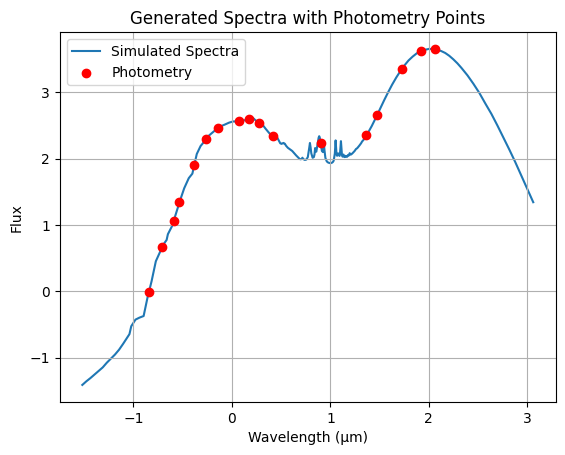

In [11]:
spectra = pd.read_csv('./data/spectra.csv').T
spectra.reset_index(inplace=True)
spectra.columns = range(len(spectra.columns))
spectra = spectra.values.astype(np.float64)
spectra_flux = spectra[:,1:]
spectra_wave = spectra[:,0]

photo = pd.read_csv('./data/interpolated_spectra.csv').T
photo.reset_index(inplace=True)
photo.columns = range(len(photo.columns))
photo = photo.values.astype(np.float64)
photo_flux = photo[:,1:]
photo_wave = photo[:,0]
print(photo_flux.shape, photo_wave.shape)
plot_data(spectra_wave, spectra_flux[:,4], photo_wave, photo_flux[:,4])